# <font color='navy'>Step 1 Problem Definition - Business Perspective:</font>

* **Customer Acquisition - Direct Marketing**

* Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as through digital marketing (e.g., email marketing, advertisements, social media, phone calls).

* Digital marketing campaigns is one of the most effective way to reach out to people. However, they require huge investment to execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted.

* The data is related to direct marketing campaigns of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

* We are using the dataset employed by two research articles as given below

> * S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.

> * In P. Novais et al., Proceedings of the European Simulation and Modelling Conference
These artciles are given in our learning management system as a suplemental reading material - feel free to read them


# <font color='navy'>Step 2 Data Collection:</font>

* We get the data from Kaggle directory.
* Of course in real life, you will use SQL, access to databases at work, write SQL querries to obtain the data. * You will need to join tables, or even use multiple databases to get the data you need for the problem you aim to solve.

* The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The dataset contains 45,211 rows and 18 columns.

In [ ]:
import pandas as pd

# Using the direct link to the file

# Read the CSV file using Pandas (pd)
url = 'https://drive.google.com/file/d/1zUarGflaS9Abus0bmPW_qmaQ2V5lM4NX/view?usp=sharing'

# Extracting the file ID from the URL
file_id = url.split('/')[-2]

# Constructing the download link for the file
download_link = 'https://drive.google.com/uc?export=download&id=' + file_id

# Reading the CSV file from the provided link
data = pd.read_csv(download_link, sep = ';')


#READ BELOW COMMENT CAREFULLY
# Use the below code only if you reach download limit on G-Drive
#data = pd.read_csv('https://raw.githubusercontent.com/marineevy/datasets/main/bank_marketing.csv', sep = ';')

# Use the below code only if you cannot load the data using previous two methods
#data = pd.read_csv('/content/bank_marketing.csv', sep = ';')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
dataset.columns # recall that y represents whether the client will subscribe to a term deposit (variable y).
# this is similar to the client opening a savings account and putting money in it

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Define the input and output variables
y = dataset['y'].copy()
X = dataset.drop(['y'], axis = 1)

In [ ]:
# let's check if there are any null values in the output variable
# if we do have some,  we need to remove them using the below code
# dataset = dataset.drop(dataset.loc[dataset[output_var].isnull(),:].index, axis = 0)
# if there are missing values in the input variables, instead of removing them we can replace them.

# below shows that there is no missing data in the output var, which is great.
y.isnull().sum()

0

* Recall in the data collection step, we mentioned that We always need two datasets in predictive modeling: Training and Testing Data.
* The training dataset is used to build the model (i.e., computing the betas). The model learns patterns and relationships from this data to make future predictions.
* The testing dataset is used to evaluate the performance of the built model. In other words, the test dataset is our “pretend future” dataset. Because we will use our model on future observations to make predictions, we need to test how our model will perform on a dataset that has not seen before.
* Basically, we want to see if the model is good to be used for making future predictions through test dataset.

* So we have just one dataset, how we will go from one dataset two datasets.
* This is very simple: We will take the main dataset and randomly divide into training and testing sets.
* Generally, we use 70 percent for training and 30 percent for testing.
* Divising the main dataset can be done using a function.

In [ ]:
# Define a list to store the names of columns to be removed
col_names = []

# Iterate through each column in the features DataFrame
for i in X.columns:
    # Check if more than 70% of the values in the column are NaN
    if X[i].isna().sum() / len(X) > 0.7:
        # Append the column name to the list of columns to be removed
        col_names.append(i)
        # Drop the column from the features DataFrame
        X = X.drop(i, axis=1)

# Print the names of the columns that were removed
col_names


[]

In [ ]:
# Train and Test Split

# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import pandas and numpy libraries (used for data manipulation and numerical operations)
import pandas as pd
import numpy as np

# Split the dataset into training and testing sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.33 indicates that 33% of the data will be used for testing, and the remaining 67% will be used for training
# random_state=42 ensures reproducibility of the split (the same random state will produce the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Display the first few rows of the training features DataFrame
X_train.head()

# Uncomment the line below to display the first few rows of the training target values DataFrame
# y_train.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
41031,29,housemaid,single,tertiary,no,453,no,no,cellular,13,aug,126,2,-1,0,unknown
41950,55,services,married,secondary,no,0,no,no,cellular,22,oct,102,1,106,1,failure
39883,56,services,divorced,secondary,no,935,no,no,cellular,2,jun,136,1,96,3,failure
44938,47,housemaid,single,tertiary,no,3232,no,no,telephone,6,oct,541,1,204,3,failure
42103,39,technician,married,tertiary,no,508,no,no,cellular,2,nov,154,3,-1,0,unknown


# <font color='navy'>Step 3 Data Processing</font>
* In real life, you will need to do all the steps as outlined in previous modules, particularly in the data preprocessing module.
* You will need to extract features (recall the movies dataset where we extracted the cast information, directors, writers)
* You will handle missing values outliers
* You will need to standardize/scale the numerical variables.
* You will convert categorical variables into numerical variables
* If you have text data like feedback comments you will need to process that data to creaste tf-idf/dtm etc.

## <font color='maroon'>Step 3.1 Data processing: data cleaning - identify and deal with missing data</font>

In [ ]:
numerical_cols = list(set(X_train.select_dtypes(exclude = object).columns)) # Your code goes in here
categorical_cols = list(set(X_train.select_dtypes(include = object).columns)) # Your code goes in here

In [ ]:
# Run this cell. It will display the results of your code
# Do not change this cell.
print(numerical_cols)
print(categorical_cols)

['day', 'previous', 'age', 'pdays', 'campaign', 'balance', 'duration']
['month', 'default', 'poutcome', 'housing', 'education', 'marital', 'loan', 'contact', 'job']


In [ ]:
# Import the nan constant from the math module
from math import nan

# Import the SimpleImputer class from scikit-learn's impute module
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object for imputing missing numerical values with the mean of the column
num_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# Create a SimpleImputer object for imputing missing categorical values with the most frequent value of the column
cat_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")


# Fit the numerical imputer on the training data for numerical columns
# This calculates the mean of each numerical column in the training set
num_imputer.fit(X_train[numerical_cols])

# Fit the categorical imputer on the training data for categorical columns
# This calculates the most frequent value of each categorical column in the training set
cat_imputer.fit(X_train[categorical_cols])

# Transform the numerical columns in the training data by replacing missing values with the calculated means
X_train[numerical_cols] = num_imputer.transform(X_train[numerical_cols])

# Transform the categorical columns in the training data by replacing missing values with the most frequent values
X_train[categorical_cols] = cat_imputer.transform(X_train[categorical_cols])


# Transform the numerical columns in the testing data by replacing missing values with the calculated means
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

# Transform the categorical columns in the testing data by replacing missing values with the most frequent values
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

## <font color='maroon'>Step 3.2 Data processing: scale data data</font>

In [ ]:
# Select the numerical columns (columns of type int64 and float64) from the training data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical columns
numerical_cols

# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object for standardizing numerical features
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the training data
# This calculates the mean and standard deviation for each numerical column in the training set
scaler.fit(X_train[numerical_cols])

# Transform the numerical columns in the training data by standardizing them
# This scales the numerical features so that they have a mean of 0 and a standard deviation of 1
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])


X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## <font color='maroon'>Step 3.3 Data processing: Encode categorical variables</font>
* Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.

In [ ]:
# Import the OneHotEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns (columns of type object) from the training data
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
categorical_cols

# Initialize the OneHotEncoder to handle categorical variables
# 'handle_unknown='ignore'' will ignore categories that weren't in the training set
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the categorical variables in the training data
enc.fit(X_train[categorical_cols])

# Transform the categorical variables and store as a new DataFrame 'dummies'
# The transformed data is converted to an array and wrapped in a DataFrame for integration
# 'get_feature_names_out()' provides new column names indicating each unique category
dummies = pd.DataFrame(enc.transform(X_train[categorical_cols]).toarray(),
                       columns=enc.get_feature_names_out())

# Drop the original categorical columns from the training data to avoid redundancy
X_train.drop(categorical_cols, axis=1, inplace=True)

# Reset the index of the training data to ensure proper alignment when concatenating
X_train.reset_index(drop=True, inplace=True)

# Concatenate the original training data with the new 'dummies' DataFrame along columns (axis=1)
X_train = pd.concat([X_train, dummies], axis=1)

# Display the first two rows of the modified training data to verify changes
X_train.head(2)


# Encode cat variables in the x_test set
dummies = pd.DataFrame(enc.transform(X_test[categorical_cols]).toarray(),
                       columns=enc.get_feature_names_out())
X_test.drop(categorical_cols, axis=1, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, dummies], axis=1)

## <font color='maroon'>Step 3.4 Data preprocessing: Make output variable binary</font>

In [ ]:
# encode the y variable as 0 and 1 so they will be numbers not yes and no
y_train[y_train == 'no'] = 0
y_train[y_train == 'yes'] = 1
y_train = y_train.astype(int) # make sure you set the y variable as int sometimes the variable type can stay as object depite being encoded as o and 1
y_test[y_test== 'no'] = 0
y_test[y_test == 'yes'] = 1
y_test = y_test.astype(int)

In [ ]:
# Let's check if the dataset is balanced
# as seen here the dataset is not balanced (there are many more instances where y is zero as compared to 1)
# we will need to balance it in the preprocessing stage.
y_train.value_counts()

y
0    26747
1     3544
Name: count, dtype: int64

## <font color='maroon'>Step 3.5 Data processing: Data balancing</font>

In [ ]:

sm = SMOTE(random_state=10)
cols = X_train.columns
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns = cols)
y_train = pd.DataFrame(y_train, columns = ['y'])

In [ ]:
# Let's check if the dataset is balanced
# as seen here the dataset is not balanced (there are many more instances where y is zero as compared to 1)
# we will need to balance it in the preprocessing stage.
y_train.value_counts()

y
0    26747
1    26747
Name: count, dtype: int64

# <font color='navy'>Step 4 EDA and Data Visualization:</font>
* We have covered descriptive statistics and data visualization techniques in the previous modules.
* Conduct some de scriptive statistics
* Develop hypotheses and test them
* Do some visualizations.
* Feel free to do some explaratory analysis.

# <font color='navy'>Step 5 - Model Building and Predicting Output Variable on Test Data </font>

In [ ]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.124129,-0.304271,-0.339305,-0.509796,-0.243598,-0.410463,-0.305940,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0
1,1.322766,-0.457537,0.742844,-0.602681,-0.561829,0.653121,0.225042,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0
2,1.416877,-0.141192,-1.661932,-0.471094,-0.561829,0.553721,1.287006,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
3,0.569875,0.635967,-1.180977,1.096341,-0.561829,1.627246,1.287006,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,1.0,0.0,1.000000,0.0,0.000000,0.0
4,-0.183015,-0.285662,-1.661932,-0.401430,0.074633,-0.410463,-0.305940,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53489,-0.184406,0.381157,-1.420271,1.775971,0.073066,2.210038,0.753410,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.995076,0.0,0.004924,0.0
53490,0.120045,0.345782,-0.955171,1.902334,-0.561829,-0.410463,-0.305940,0.0,1.0,0.0,...,0.0,0.0,0.877977,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0
53491,-0.907372,-0.385091,-0.459544,-0.260501,-0.561829,0.633241,0.225042,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
53492,2.431069,0.502864,-1.600538,-0.259376,-0.561829,0.617172,0.756024,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.755304,0.0,0.244696,0.0


In [ ]:
# Building the Model

# Import the datasets and linear_model modules from scikit-learn
from sklearn import datasets
from sklearn import linear_model

# Create a linear regression object
log_reg = linear_model.LogisticRegression()

# Train the linear regression model using the training data
# The fit method is used to train the linear regression model with the training features (X_train) and target values (y_train)
log_reg.fit(X_train, y_train.values[:,0])
# log_reg.fit(X_train, y_train)

print('logistic regression accuracy: ', log_reg.score(X_train, y_train))


logistic regression accuracy:  0.8479829513590309


In [ ]:
# Let's print the coefs
print('coeffcients', log_reg.coef_)

coeffcients [[-0.01187483  0.01307704  0.02647375  1.61527023 -0.41012483  0.02486265
   0.07265827  0.27568485 -0.04664522 -0.28821296 -0.41803186  0.09277223
   0.65498273 -0.26174001 -0.13626322  0.81304852  0.0292463  -0.17777525
  -0.74951039 -0.12885953 -0.19202025  0.10843551 -0.34920674  0.09790411
   0.28179848 -0.24294013  0.11119107 -0.32363535  0.35392523 -0.56636951
   0.27197468 -0.48441896  0.61097882  0.49939893 -1.32282202  0.13316445
  -1.00401481  0.56011949 -0.197703   -1.61294324 -1.17355608  0.26382498
   1.93609445 -0.65859336 -0.99582244  1.49024981  1.04673547 -0.76319447
  -0.75440586  2.0124941  -0.70733805]]


In [ ]:
# Create the predictioms dataframe for the test case
predictions = pd.DataFrame(log_reg.predict_proba(X_test)[:, 1], columns = ['preds_prob'])
predictions['preds'] = log_reg.predict(X_test)
predictions['actual'] = y_test.values
predictions

,preds_prob,preds,actual
0,0.030313,0,0
1,0.096187,0,0
2,0.699739,1,0
3,0.784899,1,0
4,0.105525,0,0
...,...,...,...
14915,0.121398,0,0
14916,0.019669,0,0
14917,0.224184,0,0
14918,0.749969,1,0


In [ ]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
cm = confusion_matrix(predictions['preds'], predictions['actual'])

In [ ]:
# Import necessary module
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix based on the actual and predicted values
cm = confusion_matrix(predictions['actual'], predictions['preds'])

# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.85
Sensitivity: 0.81
Specificity: 0.85
Precision: 0.42


* Let's compute the performance metrics, such as sensitivity specificity, AUC, etc.
* Let's get started

In [ ]:
from sklearn.metrics import mean_squared_error as MSE, accuracy_score, roc_auc_score, confusion_matrix, roc_curve

# Function to convert probabilities to binary class labels based on a threshold of 0.5
def get_binary_class(X):
    class_list = X.copy()  # Make a copy of the input array
    for i in range(len(X)):
        if X[i] > 0.5:  # If the probability is greater than 0.5, classify as 1 (positive class)
            class_list[i] = 1
        else:  # Otherwise, classify as 0 (negative class)
            class_list[i] = 0
    return class_list  # Return the binary class labels

# Function to calculate various performance measures for binary classification
def perf_measures(actual, pred):
    # Calculate the confusion matrix and extract the true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = confusion_matrix(actual, get_binary_class(pred)).ravel()

    # Calculate sensitivity (recall) as the proportion of actual positives correctly identified
    sensitivity = tp / (tp + fn)

    # Calculate specificity as the proportion of actual negatives correctly identified
    specificity = tn / (tn + fp)

    # Calculate accuracy as the proportion of all correct predictions
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate precision as the proportion of positive predictions that are actually positive
    precision = tp / (tp + fp)

    # Calculate F-measure (F1 score) as the harmonic mean of precision and recall
    f_measure = tp / (tp + 0.5 * (fp + fn))

    # Calculate Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
    auc = roc_auc_score(actual, get_binary_class(pred))

    # Return the calculated performance measures
    return [auc, accuracy, sensitivity, specificity, precision, f_measure]


In [ ]:
# Calculate performance measures for the given actual and predicted probabilities
auc, accuracy, sensitivity, specificity, precision, f_measure = perf_measures(predictions['actual'], predictions['preds_prob'])

# Print the calculated performance measures
print(f'AUC: {auc}')          # Print the Area Under the ROC Curve (AUC) score
print(f'Accuracy: {accuracy}')  # Print the accuracy score
print(f'Sensitivity: {sensitivity}')  # Print the sensitivity (recall) score
print(f'Specificity: {specificity}')  # Print the specificity score
print(f'Precision: {precision}')  # Print the precision score
print(f'F-Measure: {f_measure}')  # Print the F-measure (F1 score)

AUC: 0.8308293144413695
Accuracy: 0.8469839142091152
Sensitivity: 0.8097421203438395
Specificity: 0.8519165085388994
Precision: 0.42003567181926277
F-Measure: 0.553141514973576


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the ROC curve for a given model
def get_roc_curve(y_test, y_score, model_name):
    # Calculate the AUC-ROC score
    roc_auc = roc_auc_score(y_test, get_binary_class(y_score))

    # Calculate the false positive rate (fpr) and true positive rate (tpr)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Define the label for the plot including the model name and AUC score
    label = model_name + ' AUC %0.3f'

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=label % roc_auc)

    # Plot a diagonal line representing a random classifier
    plt.plot([0, 1], [0, 1], 'r--')

    # Set the x-axis limits
    plt.xlim([0.0, 1.0])

    # Set the y-axis limits
    plt.ylim([0.0, 1.05])

    # Label the x-axis
    plt.xlabel('False Positive Rate')

    # Label the y-axis
    plt.ylabel('True Positive Rate')

    # Set the title of the plot
    plt.title(model_name + ' ROC')

    # Display the legend in the lower right corner
    plt.legend(loc="lower right")

    # Ensure a tight layout for the plot
    plt.tight_layout()


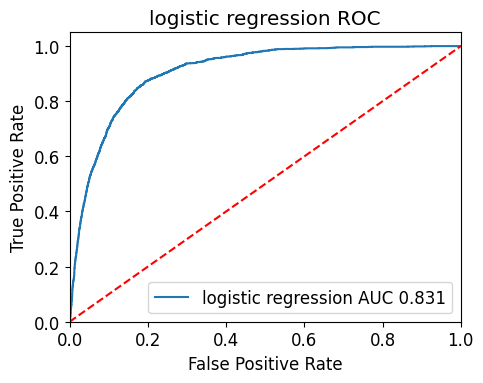

In [ ]:
# Update the default font size for plots
plt.rcParams.update({'font.size': 12})

# Create a new figure with specified size
plt.figure(figsize=(5, 4))

# Call the function to plot the ROC curve for the logistic regression model
get_roc_curve(predictions['actual'], predictions['preds_prob'], 'logistic regression')


# <font color='navy'>Step 5 Model Building - Decision Tree Classifier:</font>

In [ ]:
# Import the tree module from scikit-learn
from sklearn import tree

# Create a Decision Tree Classifier object
clf_tree = tree.DecisionTreeClassifier()  # tree.DecisionTreeRegressor(max_depth=20)

# Train the decision tree classifier using the training data
clf_tree.fit(X_train, y_train)

# Make predictions on the training data
pred_train = clf_tree.predict(X_train)

# Make predictions on the test data
pred_test = clf_tree.predict(X_test)

# Convert the array of predicted classes into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()

# Calculate the confusion matrix based on the actual and predicted values
cm = confusion_matrix(predictions['actual'], predictions['preds'])

# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.87
Sensitivity: 0.56
Specificity: 0.92
Precision: 0.47


In [ ]:
# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Create a DataFrame for the feature importances calculated by the decision tree classifier
# The DataFrame will have two columns: 'IMPORTANCE' and 'VARIABLE'
# 'IMPORTANCE' will contain the importance scores
# 'VARIABLE' will contain the corresponding feature names from the training data
var_importance = pd.DataFrame(clf_tree.feature_importances_, columns=['IMPORTANCE'])
var_importance['VARIABLE'] = X_train.columns

# Sort the DataFrame by the importance scores in descending order
var_importance.sort_values(by='IMPORTANCE', ascending=False, inplace=True)

# Set the index of the DataFrame to the feature names for easier visualization
var_importance.index = var_importance['VARIABLE']

# Display the first few rows of the variable importance DataFrame to verify the feature importances
var_importance.head()


,IMPORTANCE,VARIABLE
VARIABLE,,
duration,0.357439,duration
day,0.064683,day
contact_unknown,0.062948,contact_unknown
poutcome_success,0.061006,poutcome_success
campaign,0.047802,campaign


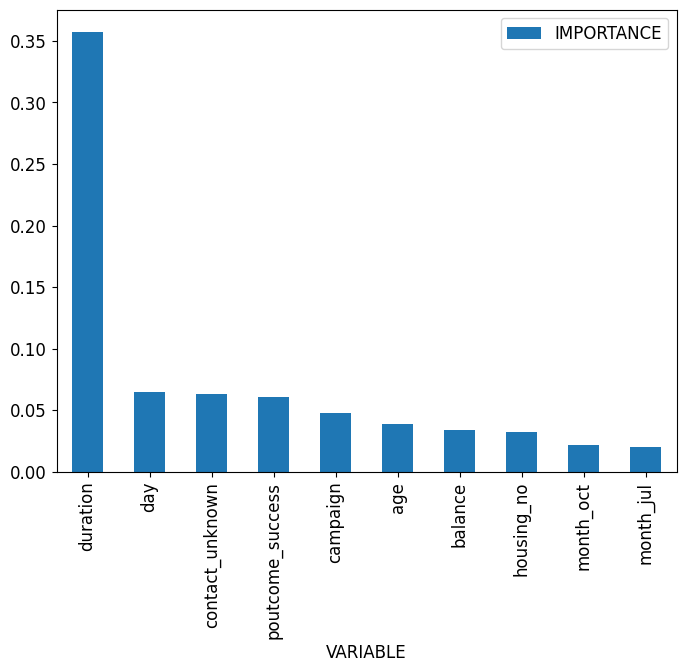

In [ ]:
# Plot the top 10 feature importances as a bar chart
# The plot will have a size of 8x6 inches
var_importance[:10].plot(kind='bar', figsize=(8,6))

# Display the plot
plt.show()